In [2]:
import pickle
with open('artist_docs2.pkl', 'rb') as f:
    all_tracks= pickle.load(f)
print(len(all_tracks))

418994


In [5]:
import pandas as pd
all_df = pd.DataFrame(all_tracks)
all_df.count()

artist1    418994
artist2    418994
url        418994
dtype: int64

In [6]:
import networkx as nx

G = nx.Graph()
for i in range(len(all_df)):
    
    artist1 = all_df.iloc[i]['artist1']
    artist2 = all_df.iloc[i]['artist2']
    
    if ('&' not in artist1) and ('&' not in artist2):
        
        if not G.has_node(artist1):
            G.add_node(artist1)
        if not G.has_node(artist2):
            G.add_node(artist2)
        if not G.has_edge(artist1,artist2):
            G.add_edge(artist1, artist2, weight=1)
        else:
            try:
                G[artist1][artist2]['weight'] += 1
            except:
                print(G[artist1][artist2])
                break

print(G.number_of_edges())
print(G.number_of_nodes())

159091
9378


In [7]:
nx.shortest_path(G, 'Lane 8', 'deadmau5', weight='weight')

['Lane 8', 'Stan Kolev', 'deadmau5']

In [10]:
import numpy as np

weights = []
for i in range(len(all_df)):
    
    artist1 = all_df.iloc[i]['artist1']
    artist2 = all_df.iloc[i]['artist2']
    
    if ('&' not in artist1) and ('&' not in artist2):
        weights.append(G[artist1][artist2]['weight'])
    
print(np.max(weights))
print(np.mean(weights))

165
2.356849160476139


In [11]:
max_weight = np.max(weights)
print(max_weight)

165


In [13]:
pairs = []
for i in range(len(all_df)):
    
    artist1 = all_df.iloc[i]['artist1']
    artist2 = all_df.iloc[i]['artist2']
    
    if ('&' not in artist1) and ('&' not in artist2):
        pairs.append(tuple((artist1,artist2)))
    
print(len(set(pairs)))
pairs = set(pairs)

168651


In [14]:
G_new = G.copy()

new_weights = []
for pair in pairs:
    
    artist1 = pair[0]
    artist2 = pair[1]
    
    if ('&' not in artist1) and ('&' not in artist2):
        
        # Invert and normalize weights
        new_weights.append(1. - (G_new[artist1][artist2]['weight'] / max_weight))

        G_new[artist1][artist2]['weight'] = 1. - (G[artist1][artist2]['weight'] / float(max_weight))

In [15]:
# Shortest path Lane 8 -- deadmau5           
print(nx.shortest_path(G_new, 'Lane 8', 'deadmau5', weight='weight'))

['Lane 8', 'FISHER', 'deadmau5']


In [16]:
# Shortest path Lane 8 -- Kryder          
print(nx.shortest_path(G_new, 'Lane 8', 'Kryder', weight='weight'))

['Lane 8', 'Justice', 'Kryder']


In [18]:
# Shortest path Lane 8 -- Above & Beyond          
print(nx.shortest_path(G_new, 'Lane 8', 'ALPHA 9', weight='weight'))

['Lane 8', 'FISHER', 'Daft Punk', 'ALPHA 9']


### It definitely abuses nodes that represent artists that are probably played constantly (i.e. Pryda/Prydz)
- Weight by inverse representation of artists on both sides of edge could fix this

In [19]:
from collections import Counter

all_artists = np.append(all_df['artist1'], all_df['artist2'])
artist_weights = Counter(all_artists)

max_count = np.max(list(artist_weights.values()))
for key in artist_weights.keys():
    artist_weights[key] /= float(max_count)
artist_weights

Counter({'Frequencerz & B-Front': 0.010940919037199124,
         'Warface': 0.15098468271334792,
         'Neroz': 0.045951859956236324,
         'Warface & D-Sturb': 0.01663019693654267,
         'Neroz ft. Mc Renegade': 0.010940919037199124,
         'APEXX': 0.010940919037199124,
         'Regain': 0.08052516411378556,
         'Act Of Rage & Killshot': 0.022757111597374178,
         'The Viper & Neophyte': 0.010940919037199124,
         'Max Enforcer ft. The Rush': 0.010940919037199124,
         'Ncrypta': 0.02450765864332604,
         'Jack Of Sound & N-Vitral': 0.010940919037199124,
         'Adaro & Rob Gee': 0.018380743982494528,
         'E-Force & D-Sturb': 0.019693654266958426,
         'Malice & Rooler': 0.010940919037199124,
         'Riot Shift': 0.09190371991247265,
         'Delete & Deetox ft. MC Livid': 0.020568927789934355,
         'Rooler': 0.01925601750547046,
         'Delete': 0.12866520787746172,
         'THE-PR\\xc3\\x98PHECY': 0.004814004376367615,
         

In [20]:
G_weighted = G.copy()

weighted_weights  = [] #great var name
for pair in pairs:
    
    artist1 = pair[0]
    artist2 = pair[1]
    
    if ('&' not in artist1) and ('&' not in artist2):
        
        weighted_weights.append(\
                                (1. - (G[artist1][artist2]['weight'] / float(max_weight))) *\
                                                 artist_weights[artist1] * artist_weights[artist2]
                               )

        G_weighted[artist1][artist2]['weight'] = (1. - (G[artist1][artist2]['weight'] / float(max_weight))) *\
                                                 artist_weights[artist1] * artist_weights[artist2]

In [21]:
# Shortest path Lane 8 -- deadmau5 (priority to lesser known artist)     
print(nx.shortest_path(G_weighted, 'Lane 8', 'deadmau5', weight='weight'))

### FUCK YESSSSSSSS -- but not sure why we still have features getting thru...

['Lane 8', 'Hosini', 'Nuage', 'TSHA', 'Rampa', 'Weekend Heroes', 'Alex Niggemann', 'ANOTR', 'Thys', 'Spencer Brown', 'Rinzen', 'FLIP-FLOP', 'deadmau5 X Mr. Bill', 'Electrocado ft. Sylvain Carton', 'deadmau5']


In [22]:
# Shortest path Lane 8 -- deadmau5 (priority to lesser known artist)     
print(nx.shortest_path(G_weighted, 'Lane 8', 'Kryder', weight='weight'))

### Dont know any of these motherfuckers

['Lane 8', 'Hosini', 'Nuage', 'Steve Hauschildt', 'KH', 'Logic1000', 'Four Tet', 'Izzy Bizu', 'Digitalism', 'Hilary Roberts', 'Kryder']


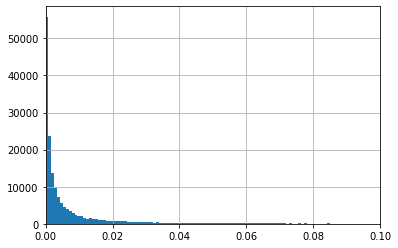

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline
ax = plt.hist(weighted_weights, bins=1000)
grid = plt.grid()
xlim = plt.xlim([0,.1])

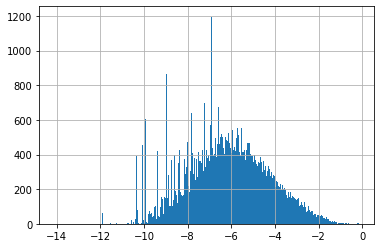

In [25]:
%matplotlib inline
ax = plt.hist([np.log(w) for w in weighted_weights if w != 0], bins=1000)
grid = plt.grid()

In [21]:
import numpy as np
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])
    
Str1 = "Lane 8"
Str2 = "Lane8"
Distance = levenshtein_ratio_and_distance(Str1,Str2)
print(Distance)
Ratio = levenshtein_ratio_and_distance(Str1,Str2,ratio_calc = True)
print(Ratio)

The strings are 1 edits away
0.9090909090909091


In [22]:
def node_match(string, graph):
    
    matches = []
    for node_name in list(graph.nodes()):
        ratio = levenshtein_ratio_and_distance(string.lower(),node_name.lower(),ratio_calc=True)
        matches.append((ratio,node_name))
        
    return sorted(matches, key=lambda x: x[0], reverse=True)[:10]

node_match('Joyryde', G_new)

[(1.0, 'JOYRYDE'),
 (0.7272727272727273, 'Jyye'),
 (0.6666666666666666, 'Rydel'),
 (0.6153846153846154, 'Jordon'),
 (0.6153846153846154, 'Jaydee'),
 (0.6153846153846154, 'Kryder'),
 (0.6153846153846154, 'Dorade'),
 (0.6086956521739131, 'JOYRYDE ft. GOLD'),
 (0.5714285714285714, 'Orkidea'),
 (0.5714285714285714, 'Ordonez')]

### Artist Library Clustering???
- Need to do this on the played by data

In [26]:
raw_nodes = sorted(list(artist_weights.items()), key=lambda x: x[1], reverse=True)
raw_nodes = [node[0] for node in raw_nodes]
raw_nodes = [node for node in raw_nodes if '&' not in node][:1000]
node_matrix = np.zeros((len(raw_nodes),len(raw_nodes)))
print(node_matrix.shape)

(1000, 1000)


In [27]:
#del node_matrix
raw_nodes

['FISHER',
 'Calvin Harris',
 'Armin van Buuren',
 'Drake',
 'Axwell',
 'Daft Punk',
 'Tiesto',
 'Zomboy',
 'Purple Disco Machine',
 'Diplo',
 'Martin Garrix',
 'Lost Frequencies ft. Flynn',
 'Kanye West',
 'Travis Scott ft. Drake',
 'Avicii ft. Aloe Blacc',
 'Giuseppe Ottaviani',
 'Jack Back',
 'BROHUG',
 'Avicii',
 'Sheck Wes',
 'Swedish House Mafia',
 'Meduza ft. GOODBOYS',
 'Pickle',
 'Post Malone',
 'Billie Eilish',
 'Alesso',
 'Afrojack',
 'RL Grime',
 'Jonas Aden ft. RebMoe',
 'Malaa',
 'Queen',
 'A$AP Ferg',
 'Slushii',
 'Quintino',
 'Valentino Khan',
 'Anna Lunoe',
 'Kideko',
 'Toby Green',
 'RetroVision',
 'DJ Snake',
 'The Chemical Brothers',
 'Eric Prydz',
 'Joel Corry',
 'Sunstars',
 'Fedde Le Grand',
 'Nitti Gritti',
 'Gammer',
 'Offaiah ft. Cat Connors',
 'Panic! At The Disco',
 'JOYRYDE',
 'Blasterjaxx',
 'ARTY',
 'Dave Winnel',
 'Yotto',
 'Zen/It',
 'D.O.D',
 'Virtual Riot',
 'LOOPERS',
 'R\\xc3\\x9cF\\xc3\\x9cS DU SOL',
 'Zatox',
 'Jack Wins ft. Amy Grace',
 'Galantis

In [28]:
for i in range(len(raw_nodes))[:]:
    for j in range(len(raw_nodes)):
        if i == j:
            node_matrix[i][j] = 0
        else:
            try:
                node_matrix[i][j] = G[raw_nodes[i]][raw_nodes[j]]['weight']
                #print(node_matrix[i][j])
            except:
                node_matrix[i][j] = 0

                
for i in range(len(raw_nodes))[:]:
    
    if np.sum(node_matrix[i,:]) == 0:
        pass
    else:
        node_matrix[i,:] /= np.sum(node_matrix[i,:])


In [51]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = TSNE(n_components=3).fit_transform(node_matrix)
#X = PCA(n_components=3).fit_transform(node_matrix)
X

array([[ 10.950334,   9.382879,  39.590214],
       [ 42.946438, -19.80436 ,  37.290703],
       [-57.673462, -29.056753, -35.87114 ],
       ...,
       [-23.791798, -25.007437,  86.92012 ],
       [-45.35475 , -14.420662, -99.34145 ],
       [  3.007917,  -6.801518,  16.402256]], dtype=float32)

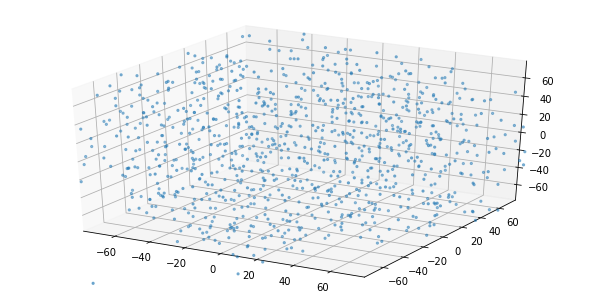

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(8,4))
ax = Axes3D(fig) 
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=5)

xlim = ax.set_xlim3d([-75,75])
ylim = ax.set_ylim3d([-75,75])
zlim = ax.set_zlim3d([-75,75])
# xlim = ax.set_xlim3d([-.03,.03])
# ylim = ax.set_ylim3d([-.03,.03])
# zlim = ax.set_zlim3d([-.03,.03])

Silhouette Coefficient 5: 0.390
Silhouette Coefficient 6: 0.394
Silhouette Coefficient 7: 0.410
Silhouette Coefficient 8: 0.394
Silhouette Coefficient 9: 0.380
Silhouette Coefficient 10: 0.374
Silhouette Coefficient 11: 0.381
Silhouette Coefficient 12: 0.372
Silhouette Coefficient 13: 0.366
Silhouette Coefficient 14: 0.388
Silhouette Coefficient 15: 0.371
Silhouette Coefficient 16: 0.393
Silhouette Coefficient 17: 0.389
Silhouette Coefficient 18: 0.393
Silhouette Coefficient 19: 0.387
Silhouette Coefficient 20: 0.379


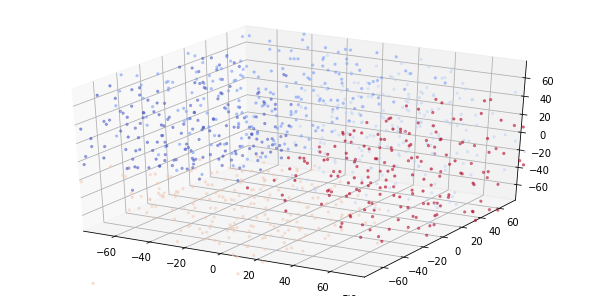

In [55]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics

for i in range(5,21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    print("Silhouette Coefficient %d: %0.3f" % (i, metrics.silhouette_score(X, kmeans.labels_, metric='sqeuclidean')))

fig = plt.figure(figsize=(8,4))
ax = Axes3D(fig) 
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
colors = kmeans.labels_

ax = Axes3D(fig) #<-- Note the difference from your original code...
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=5, c=colors, cmap=plt.cm.coolwarm)

xlim = ax.set_xlim3d([-75,75])
ylim = ax.set_ylim3d([-75,75])
zlim = ax.set_zlim3d([-75,75])
# xlim = ax.set_xlim3d([-.03,.03])
# ylim = ax.set_ylim3d([-.03,.03])
# zlim = ax.set_zlim3d([-.03,.03])

Estimated number of clusters: 6
Silhouette Coefficient: 0.394


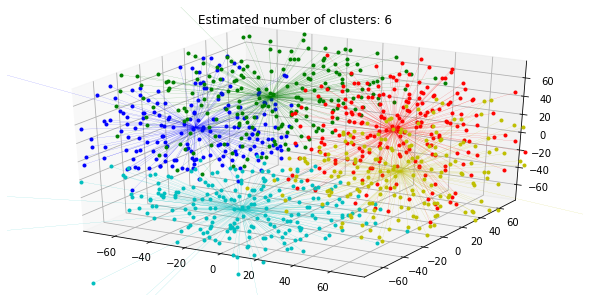

In [56]:
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

n_clusters_ = len(cluster_centers)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

fig = plt.figure(figsize=(8,4))
ax = Axes3D(fig) 

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[class_members, 0], X[class_members, 1], X[class_members, 2], col + '.')
    #plt.plot(cluster_center[0], cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
    #         markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        ax.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], [cluster_center[2], x[2]], col, linewidth=.1)

xlim = ax.set_xlim3d([-75,75])
ylim = ax.set_ylim3d([-75,75])
zlim = ax.set_zlim3d([-75,75])
# xlim = ax.set_xlim3d([-.03,.03])
# ylim = ax.set_ylim3d([-.03,.03])
# zlim = ax.set_zlim3d([-.03,.03])

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [57]:
cluster_df = pd.DataFrame([[raw_nodes[i], labels[i]] for i in range(len(raw_nodes))])
cluster_df

,0,1
0,FISHER,1
1,Calvin Harris,5
2,Armin van Buuren,3
3,Drake,0
4,Axwell,1
5,Daft Punk,0
6,Tiesto,1
7,Zomboy,3
8,Purple Disco Machine,5
9,Diplo,1


In [58]:
cluster_df[cluster_df[1] == 0]

,0,1
3,Drake,0
5,Daft Punk,0
10,Martin Garrix,0
12,Kanye West,0
13,Travis Scott ft. Drake,0
14,Avicii ft. Aloe Blacc,0
16,Jack Back,0
18,Avicii,0
20,Swedish House Mafia,0
26,Afrojack,0


In [59]:
cluster_df[cluster_df[1] == 1]

,0,1
0,FISHER,1
4,Axwell,1
6,Tiesto,1
9,Diplo,1
25,Alesso,1
29,Malaa,1
33,Quintino,1
35,Anna Lunoe,1
38,RetroVision,1
43,Sunstars,1


In [60]:
cluster_df[cluster_df[1] == 2]

,0,1
15,Giuseppe Ottaviani,2
28,Jonas Aden ft. RebMoe,2
41,Eric Prydz,2
52,Dave Winnel,2
53,Yotto,2
65,Thomas Newson,2
83,Jorn Van Deynhoven,2
86,The Prodigy,2
89,Rodg,2
103,Simon Patterson,2


In [63]:
cluster_df[cluster_df[1] == 3]

,0,1
2,Armin van Buuren,3
7,Zomboy,3
17,BROHUG,3
19,Sheck Wes,3
22,Pickle,3
23,Post Malone,3
24,Billie Eilish,3
27,RL Grime,3
30,Queen,3
45,Nitti Gritti,3


In [61]:
cluster_df[cluster_df[1] == 4]

,0,1
11,Lost Frequencies ft. Flynn,4
